# Ensemble Method - 4
# Adaboost Gradient Boosting MAchine


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.shape

(891, 15)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df['pclass'].unique()

array([3, 1, 2])

In [ ]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [ ]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

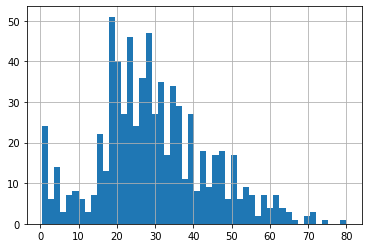

In [ ]:
df['age'].hist(bins=50)

# Data Pre-processing

In [ ]:
subset = df[['pclass', 'sex', 'age', 'survived']].copy()
subset.dropna(inplace=True)

In [ ]:
X = subset[['pclass', 'sex', 'age']].copy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
X['sex'] = le.fit_transform(subset['sex'])
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [ ]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int64  
 2   age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [ ]:
y = subset['survived'].copy()

In [ ]:
y.value_counts()

0    424
1    290
Name: survived, dtype: int64

# Fit Model

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        res = clf.predict(X_train)
        print("Train results : \n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train,
                                                               res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train,
                                                                           res)))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_train,
                                                                res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train),
                                                       lb.transform(res))))
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy : \t{0:.4f}".format(np.mean(res)))
        print("Average SD : \t\t{0:.4f}".format(np.std(res)))
        
    elif train==False:
        res_test = clf.predict(X_test)
        print("Test results : \n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test,
                                                               res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test,
                                                                           res_test)))
        print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_test,
                                                                res_test)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test),
                                                       lb.transform(res_test))))

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [ ]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print("\t\t #####################################")
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Train results : 

Accuracy Score: 0.8236

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       294
           1       0.78      0.79      0.79       205

    accuracy                           0.82       499
   macro avg       0.82      0.82      0.82       499
weighted avg       0.82      0.82      0.82       499


Confusion Matrix: 
[[249  45]
 [ 43 162]]

ROC AUC: 0.8186

Average Accuracy : 	0.7836
Average SD : 		0.0505
		 #####################################
Test results : 

Accuracy Score: 0.7721

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       130
           1       0.68      0.81      0.74        85

    accuracy                           0.77       215
   macro avg       0.77      0.78      0.77       215
weighted avg       0.79      0.77      0.77       215


Confusion Matrix: 
[[97 33]
 [16 69]]

ROC AUC: 0.7790



# Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_clf = GradientBoostingClassifier()

In [ ]:
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=True)
print("\t\t #####################################")
print_score(gbc_clf, X_train, X_test, y_train, y_test, train=False)

Train results : 

Accuracy Score: 0.8697

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       294
           1       0.88      0.79      0.83       205

    accuracy                           0.87       499
   macro avg       0.87      0.86      0.86       499
weighted avg       0.87      0.87      0.87       499


Confusion Matrix: 
[[273  21]
 [ 44 161]]

ROC AUC: 0.8570

Average Accuracy : 	0.8035
Average SD : 		0.0547
		 #####################################
Test results : 

Accuracy Score: 0.8047

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84       130
           1       0.74      0.78      0.76        85

    accuracy                           0.80       215
   macro avg       0.80      0.80      0.80       215
weighted avg       0.81      0.80      0.81       215


Confusion Matrix: 
[[107  23]
 [ 19  66]]

ROC AUC: 0.7998

